In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from pandas.tools.plotting import scatter_matrix
from __future__ import division

from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

In [6]:
pd.set_option("display.max_columns", 100)

pd.set_option('max_seq_items', 200)

In [4]:
data = pd.read_csv('zoo.csv')
data_description = pd.read_csv('class.csv')

In [5]:
data_description

,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,2,20,Bird,"chicken, crow, dove, duck, flamingo, gull, haw..."
2,3,5,Reptile,"pitviper, seasnake, slowworm, tortoise, tuatara"
3,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
4,5,4,Amphibian,"frog, frog, newt, toad"
5,6,8,Bug,"flea, gnat, honeybee, housefly, ladybird, moth..."
6,7,10,Invertebrate,"clam, crab, crayfish, lobster, octopus, scorpi..."


In [7]:
df = data.copy()

In [8]:
df.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [33]:
# small amount of data

df.shape

(101, 18)

In [53]:
df.columns

Index([u'animal_name', u'hair', u'feathers', u'eggs', u'milk', u'airborne',
       u'aquatic', u'predator', u'toothed', u'backbone', u'breathes',
       u'venomous', u'fins', u'legs', u'tail', u'domestic', u'catsize',
       u'class_type'],
      dtype='object')

In [29]:
# how many different classes are we trying to identify

df.class_type.unique()

array([1, 4, 2, 7, 6, 5, 3])

In [42]:
df.class_type.value_counts()

1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: class_type, dtype: int64

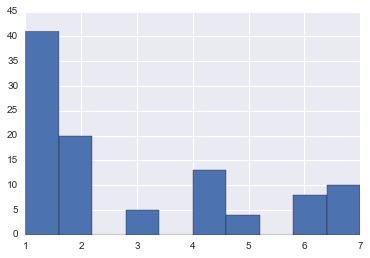

In [30]:
# want to predict class_type

df.class_type.hist()

In [31]:
df.dtypes

animal_name    object
hair            int64
feathers        int64
eggs            int64
milk            int64
airborne        int64
aquatic         int64
predator        int64
toothed         int64
backbone        int64
breathes        int64
venomous        int64
fins            int64
legs            int64
tail            int64
domestic        int64
catsize         int64
class_type      int64
dtype: object

In [32]:
df.isnull().any()

animal_name    False
hair           False
feathers       False
eggs           False
milk           False
airborne       False
aquatic        False
predator       False
toothed        False
backbone       False
breathes       False
venomous       False
fins           False
legs           False
tail           False
domestic       False
catsize        False
class_type     False
dtype: bool

In [34]:
df.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


looking at max you can see that `legs` is the only column (other than our target `class_type`) that has values other than 1 or 0. Could possibly dummy these out to see what impact that has.

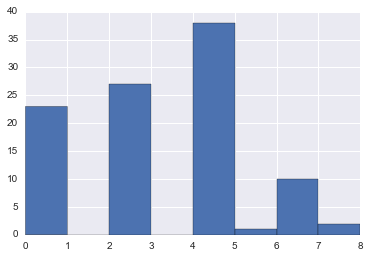

In [36]:
df.legs.hist(bins=8)

going to just move on and do a quick model

In [56]:
y = df.class_type
x = df.drop(['class_type', 'animal_name'], axis=1)

In [59]:
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [45]:
x_train.shape

(75, 17)

In [46]:
x_test.shape

(26, 17)

In [47]:
y_train.shape

(75,)

In [48]:
y_test.shape

(26,)

In [50]:
# the model Im going to try

lr = LogisticRegression()

In [60]:
lr.fit(x, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [61]:
lr.score(x_train, y_train)

0.9866666666666667

In [62]:
lr.score(x_test, y_test)

1.0

In [64]:
predictions = lr.predict(x_test)
predictions

array([3, 1, 1, 1, 1, 4, 4, 2, 5, 7, 1, 1, 2, 1, 2, 1, 4, 4, 6, 1, 2, 2,
       6, 1, 1, 1])

In [75]:
cm = pd.DataFrame(
    confusion_matrix(y_test, predictions)
)

cm

,0,1,2,3,4,5,6
0,12,0,0,0,0,0,0
1,0,5,0,0,0,0,0
2,0,0,1,0,0,0,0
3,0,0,0,4,0,0,0
4,0,0,0,0,1,0,0
5,0,0,0,0,0,2,0
6,0,0,0,0,0,0,1


In [78]:
print classification_report(y_test, predictions)

             precision    recall  f1-score   support

          1       1.00      1.00      1.00        12
          2       1.00      1.00      1.00         5
          3       1.00      1.00      1.00         1
          4       1.00      1.00      1.00         4
          5       1.00      1.00      1.00         1
          6       1.00      1.00      1.00         2
          7       1.00      1.00      1.00         1

avg / total       1.00      1.00      1.00        26

